# Kryptografia z kluczem tajnym (symetryczna): szyfry strumieniowe
### Literatura:
1. Nowoczesna kryptografia, Aumasson
2. Kryptografia dla praktyków, Schneier

*** 
# Szyfrowanie strumieniowe


## Problem 
1. Napisz prosty program szyfrujący strumień tekstu jawnego przy pomocy operatora logicznego. Jaki operator logiczny będzie najwygodniejszy? W jaki sposób wytworzysz strumień klucza? 



generator deterministyczny, przy tym samym ziarnie dostajemy ten sam ciąg losowy

In [18]:
import random
from operator import xor

key = 'Key'


message = 'This is a secret'


random.seed(key)
def randombytes(n):
    return bytes(random.getrandbits(8) for i in range(n))

print(randombytes(len(message)))

xran = randombytes(len(message))
print(xran)
mbytes = str.encode(message)
print(type(mbytes))

coded = []
for x in range(len(mbytes)):
    coded.append(xor(mbytes[x], xran[x]))

for c in coded:
    print(chr(c))



print(aaa)

b'6\xe0\xf77\x02\x07\xfd\x88\xe1\xc3\x12&\xd2\x7f\xb7\x14'
b'\n\x1at\xa0L\t\xe3\x0c\x94e\xd6\x08\x1ad\x95='
<class 'bytes'>
^
r

Ó
l
`

,
õ
E
¥
m
y

ð
I


NameError: name 'aaa' is not defined

In [23]:
import random
from operator import xor

key = 'Key'

def randomBytes(n):
    return bytes(random.getrandbits(8) for i in range(n))


def xorcryption(key, plaintext):
    random.seed(key)    
    ciphertext=[]
    for i in plaintext:
        keyStream= int.from_bytes(randomBytes(1), byteorder='big')
        ciphertext.append(chr(ord(i)^keyStream))
    
    encrypted_message = ''.join(ciphertext)
    return encrypted_message

def decryption(key, ciphertext):
    random.seed(key) 
    plaintext.clear()
# ciphertext=[]
    for i in ciphertext:
                keyStream= int.from_bytes(randomBytes(1), byteorder='big')
                plaintext.append(chr(ord(i)^keyStream))
                
    decrypted_message = ''.join(plaintext)
    return decrypted_message

message = 'This is a secret'
bytes_message = str.encode(message)
x = randomBytes(len(message))

plaintext=list(message)
random.seed(key)    
ciphertext=[]
for i in plaintext:
                keyStream= int.from_bytes(randomBytes(1), byteorder='big')
                ciphertext.append(chr(ord(i)^keyStream))
                
encrypted_message = ''.join(ciphertext)

print(encrypted_message)

random.seed(key) 
plaintext.clear()
# ciphertext=[]
for i in ciphertext:
                keyStream= int.from_bytes(randomBytes(1), byteorder='big')
                plaintext.append(chr(ord(i)^keyStream))
                
decrypted_message = ''.join(plaintext)

print(decrypted_message)

Ò`
This is a secret


### Zastanów się: 
1. Poszukaj informacji o szyfrach binarnie addytywnych 
2. Poszukaj informacji o szyfracch strumieniowych używanych w praktyce. Gdzie takie szyfry mogą być obecnie stosowane? 

### Bezpieczeństwo szyfru XOR
1. Jeśli OTP to OK.



_OTP - one time path_

2. Na czym polega atak ze znanym tekstem jawnym? 



_Jak znamy tekst jawny i wiemy że użyto xor to można odgadnąć klucz?_

3. Utwórz dwie wiadomości równej długości. Zaszyfruj je szyfrem XOR z użyciem tego samego klucza. Wyznacz alternatywę rozłączną szyfrogramów i porównaj ją z tą samą operacją wykonaną dla tekstów jawnych. Jakie znaczenie ma wynik z punktu widzenia kryptoanalizy. 




wykorzystywane tam gdzie łatwo jest ogarnąć sprzętowo xora, ale bardzo łatwo go ogarnąć


najłatwiejsze do podsłuchania są fale radiowe, jest zabezpieczona na niskim pozziomie jest zabezpieczona szyfrem strumieniowym 
Szyfry A5, są podatne ale godzimy się na to bo generalnie działa
blluetooth


In [29]:
message1 = 'aaammmaaa'
message2 = 'heheheaaa'

key = "hej"

mess1 = xorcryption(key, message1)
mess2 = xorcryption(key, message2)

print(mess1)
print(mess2)

x = decryption(key, mess1)
print (x)

Þ4í;
©[³
×0ä3¡[³
aaammmaaa


## Jak sprawdzać losowość ciągu? Testy losowaości.  

1. Poszukaj informacji o kryptograficznych generatorach liczb pseudolosowych. Jaki jest najważniejsza własność generatora z punktu widzenia kryptografii? 
2. Przykładowy test losowości monobit (https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final). Przeanalizuj kod. 





losowość barzdo ważna dla kryptografii
zestaw testów dla generat do zastosowań kryptograficznych
kryptograf generatory muszą być nieprzewidywalne
test monobit: zlicza wystąpienia 0 i 1 jeśli liczba 0 i 1 jest podobna/taka sama to jest losowy a jak nie to nie jest losowy.






In [5]:
import numpy
import math
from scipy import special as spc

def monobit(bin_data: str):
    """
    Note that this description is taken from the NIST documentation [1]
    [1] http://csrc.nist.gov/publications/nistpubs/800-22-rev1a/SP800-22rev1a.pdf
  
    The focus of this test is the proportion of zeros and ones for the entire sequence. The purpose of this test is
    to determine whether the number of ones and zeros in a sequence are approximately the same as would be expected
    for a truly random sequence. This test assesses the closeness of the fraction of ones to 1/2, that is the number
    of ones and zeros ina  sequence should be about the same. All subsequent tests depend on this test.
  
    :param bin_data: a binary string
    :return: the p-value from the test
    """
    count = 0
    # If the char is 0 minus 1, else add 1
    for char in bin_data:
        if char == '0':
            count -= 1
        else:
            count += 1
    # Calculate the p value
    sobs = count / math.sqrt(len(bin_data))
    p_val = spc.erfc(math.fabs(sobs) / math.sqrt(2))
    return p_val


#Generowanie n-bitowego ciągu 
n=3
#arr = numpy.random.randint(2, size=(n,))
bitString = []
for i in range(0, 1024):
    x = str(numpy.random.randint(0, 2))
    bitString.append(x)
arr = ''.join(bitString)
print(arr)
print(monobit(arr))

0111100011111101010111011101001100001010101101111101111011010101001110010001110101100100111111000101000000010001011101111011000100111001001010111001100010011000011011110111111011011011011011111001101110111101100100000100111101110010001000101001110000011000110010110000110001001010100000010000011000111000111011111010010011111001001100110111100110101000010100111011101011111110101001110001011011110101010111100001010100100000011011110011000101101011101111001101110111101010010000101001101111101110010100010000001111001000001001011110000010111011000101000100011001110101101010000011100001111101001100011110110100010101011000110110001000101000011001100111011000111111010100111001110011110011100111000101000101011101011110110110110111111110000111101100101110000000100000110110000000001111110000111010010010000010001111101001001111110000100111001101111111111101110111011111000000110010111000111110110010000010110000111111110011110110001001001111011111111101100011011011101111010000101001111110110110000000

## Zadanie (dodatkowe)
Testy losowości NIST https://csrc.nist.gov/publications/detail/sp/800-22/rev-1a/final
1. Zaimplementuj wybrany test losowości w postaci jupyter notebooka

# Szyfr strumieniowy RC4

1. Odkryj sposób działania algorytmu RC4. Poszukaj informacji gdzie był używany RC4.

sławny lata 80. 

opracowany przez twórcę RSA

kod algorytmu wykradziono i opublikowano w internecie

używany dawiej do protokołu wep - cabezpiecza acces point przed podsłuchaniem i wifi, ssl, ssh, 

klasyczny szyfr bin arnie addytywny xor str klucza i      powstaje strumień szyfrogramu


wstępnie posortowaną tablicę permutujemy według informacji zawartej w kluczu


dlaczego jest słaby?
bo zanim się "rozpędzi" to generuje bardzo przewidywalny strumień klucza

znaleźć łamanie WEP

znamy początek wiadomości i i wiadomość zaszyfrowaną, możem yogarnąć początek klucza a potem da radę igarnąć początek 


atak ze znanym tekstem jawnym Flubera, Mantina, Shamira

najprostrza metoda obrony:
pozwolić się rozpędzić generatorowi, tak aby bylo co najmniej  sekwencje permutacji (po zakodowaniu 1024 znaków jest bezpieczniejszy) 




 Key stream : [106, 16, 129, 29, 223, 185, 239, 197, 182, 150, 157, 252, 200, 141, 10, 238, 64, 235, 101, 43, 10, 235, 150, 214, 228, 156, 51, 47, 209, 67, 175, 29, 96, 181, 155, 235, 198, 209, 57, 138, 13, 188, 31, 215, 16, 114, 253, 237, 143, 230, 192, 241, 218, 29, 156, 130, 133, 226, 249, 107, 240, 35, 72, 162, 125, 140, 60, 115, 16, 203, 80, 30, 109, 154, 227, 241, 129]


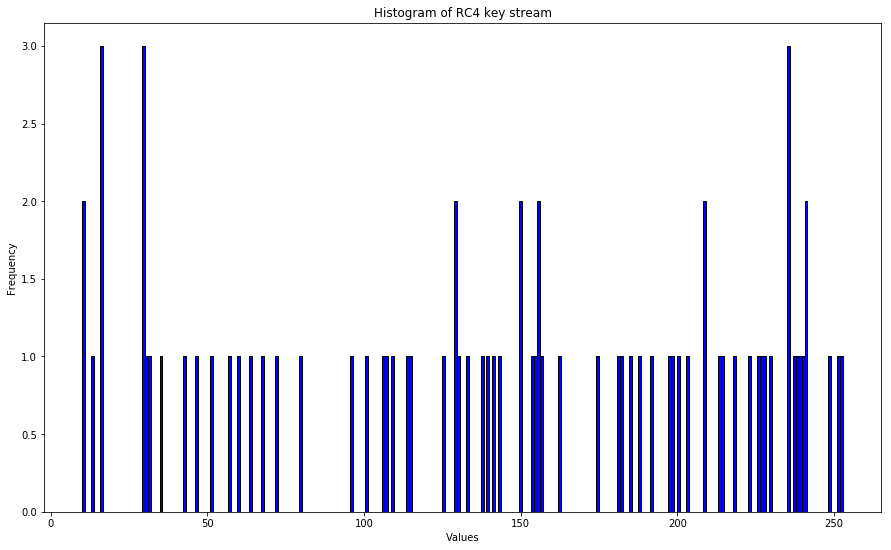

<Figure size 1080x1368 with 0 Axes>

plaintext: The purpose of this package is to generate random (plausible) text sentences.
ciphertext: 3E78E43DAFCC9DB5D9E5F8DCA7EB2A9A2882160B7A8AF5BD85FB560FB8308F690F95FC8EA8B44BEB79D93FA5711C9982E2C6E881B67CE9F1EC80950ED9033CC705F81C0075A5247B03F98682AF
decrypted: The purpose of this package is to generate random (plausible) text sentences.

 Decryption correct!


In [28]:
import codecs
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))

MOD = 256


def KSA(key):
    key_length = len(key)
    # create the array "S"
    S = list(range(MOD))  # [0,1,2, ... , 255] wypełniana liczbami od 0 do 255
    j = 0
    for i in range(MOD):      # przechodzi 
        j = (j + S[i] + key[i % key_length]) % MOD # j wyliczany na podstawie odpowiedniego elementu klucza
        S[i], S[j] = S[j], S[i]  # swap values 
    return S


def PRGA(S):
    i = 0
    j = 0
    while True:
        i = (i + 1) % MOD     # i rośnie monotonicznie modulo
        j = (j + S[i]) % MOD  # j wykorzystuje tablice do ogarnięcia miejsca do skoku

        S[i], S[j] = S[j], S[i]  # swap values
        K = S[(S[i] + S[j]) % MOD] # wartości si i sj wykorzystane żeby wskazać element tablicy który staje się strumieniem klucza
        yield K


def get_keystream(key):
    S = KSA(key)
    return PRGA(S)


def encrypt_logic(key, text, kstr):
    # For plaintext key, use this
    key = [ord(c) for c in key]
    # If key is in hex:
    # key = codecs.decode(key, 'hex_codec')
    # key = [c for c in key]
    keystream = get_keystream(key)
    res = []
    for c in text:
        ks = next(keystream)
        kstr.append(ks)
        val = ("%02X" % (c ^ ks))  # XOR and taking hex
        res.append(val)
    return ''.join(res)


def encrypt(key, plaintext):
    kstream =[]
    plaintext = [ord(c) for c in plaintext]
    text = encrypt_logic(key, plaintext,kstream)
    
    print("\n Key stream :", kstream)
    # matplotlib histogram
    plt.hist(kstream, color = 'blue', edgecolor = 'black', bins = 256)
    plt.title('Histogram of RC4 key stream')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.figure(figsize=(15,19))
    plt.show()
    return text


def decrypt(key, ciphertext):
    kstream =[]
    ciphertext = codecs.decode(ciphertext, 'hex_codec')
    res = encrypt_logic(key, ciphertext,kstream)
    return codecs.decode(res, 'hex_codec').decode('utf-8')


def main():

    key = 'not-so-random-key'  # plaintext
    plaintext = 'The purpose of this package is to generate random (plausible) text sentences.'  # plaintext
    # encrypt the plaintext, using key and RC4 algorithm
    ciphertext = encrypt(key, plaintext)
    print('plaintext:', plaintext)
    print('ciphertext:', ciphertext)
    decrypted = decrypt(key, ciphertext)
    print('decrypted:', decrypted)

    if plaintext == decrypted:
        print('\n Decryption correct!')
    else:
        print('\n Decryption incorrect!')

    # until next time folks !


def test():

    # Test case 1
    # key = '4B6579' # 'Key' in hex
    # key = 'Key'
    # plaintext = 'Plaintext'
    # ciphertext = 'BBF316E8D940AF0AD3'
    assert(encrypt('Key', 'Plaintext')) == 'BBF316E8D940AF0AD3'
    assert(decrypt('Key', 'BBF316E8D940AF0AD3')) == 'Plaintext'

    # Test case 2
    # key = 'Wiki' # '57696b69'in hex
    # plaintext = 'pedia'
    # ciphertext should be 1021BF0420
    assert(encrypt('Wiki', 'pedia')) == '1021BF0420'
    assert(decrypt('Wiki', '1021BF0420')) == 'pedia'

    # Test case 3
    # key = 'Secret' # '536563726574' in hex
    # plaintext = 'Attack at dawn'
    # ciphertext should be 45A01F645FC35B383552544B9BF5
    assert(encrypt('Secret',
                   'Attack at dawn')) == '45A01F645FC35B383552544B9BF5'
    assert(decrypt('Secret',
                   '45A01F645FC35B383552544B9BF5')) == 'Attack at dawn'

if __name__ == '__main__':
    main()

## Atak na RC4 i WEP
Bias - odchylenie. Generator RC4 jest 'biased' to znaczy nie generuje rozkładu idealnie jednostajnego. 
Liczne ataki na RC4 i WEP (za Wikipedią i innymi źródłami)c:
- ,,In 1995, Andrew Roos experimentally observed that the first byte of the keystream is correlated to the first three bytes of the key and the first few bytes of the permutation after the KSA are correlated to some linear combination of the key bytes.''

- In August 2001, Scott Fluhrer, Itsik Mantin, and Adi Shamir published a cryptanalysis of WEP that exploits the way the RC4 ciphers and IV are used in WEP, resulting in a passive attack that can recover the RC4 key after eavesdropping on the network. Depending on the amount of network traffic, and thus the number of packets available for inspection, a successful key recovery could take as little as one minute. If an insufficient number of packets are being sent, there are ways for an attacker to send packets on the network and thereby stimulate reply packets which can then be inspected to find the key. The attack was soon implemented, and automated tools have since been released. It is possible to perform the attack with a personal computer, off-the-shelf hardware and freely available software such as aircrack-ng to crack any WEP key in minutes.

- In 2005, a group from the U.S. Federal Bureau of Investigation gave a demonstration where they cracked a WEP-protected network in 3 minutes using publicly available tools.[14] Andreas Klein presented another analysis of the RC4 stream cipher. Klein showed that there are more correlations between the RC4 keystream and the key than the ones found by Fluhrer, Mantin and Shamir which can additionally be used to break WEP in WEP-like usage modes.

- In 2007, Erik Tews, Andrei Pychkine, and Ralf-Philipp Weinmann were able to extend Klein's 2005 attack and optimize it for usage against WEP. With the new attack it is possible to recover a 104-bit WEP key with probability 50% using only 40,000 captured packets. For 60,000 available data packets, the success probability is about 80% and for 85,000 data packets about 95%. Using active techniques like deauth and ARP re-injection, 40,000 packets can be captured in less than one minute under good conditions. The actual computation takes about 3 seconds and 3 MB of main memory on a Pentium-M 1.7 GHz and can additionally be optimized for devices with slower CPUs. The same attack can be used for 40-bit keys with an even higher success probability.

- In 2015, security researchers from KU Leuven presented new attacks against RC4 in both TLS and WPA-TKIP.[54] Dubbed the Numerous Occurrence MOnitoring & Recovery Exploit (NOMORE) attack, it is the first attack of its kind that was demonstrated in practice. Their attack against TLS can decrypt a secure HTTP cookie within 75 hours. The attack against WPA-TKIP can be completed within an hour, and allows an attacker to decrypt and inject arbitrary packets.

## Szyfr strumieniowy ChaCha20

In [12]:
# Pure Python ChaCha20
# Based on Numpy implementation: https://gist.github.com/chiiph/6855750
# Based on http://cr.yp.to/chacha.html
#
# I wanted an implementation of ChaCha in clean, understandable Python
# as a way to get a handle on the algorithm for porting to another language.
# There are plenty of bindings but few pure implementations, because
# Pure Python is too slow for normal practical use in Cryptography.
#
# The preceding implementation used NumPy, which avoided a lot of the
# specific issues of integer management in Python and hid a lot of the
# necessary functionality under convenience methods. The below is a rewrite
# using only pure python functions and types.
# 
# I have not done anything, use-wise, beyond making the tests pass; this
# could still do with improvement, tidying and perhaps (while we're using
# python anyway) conversion into an object.

import binascii

def isuint32(i):
    return isinstance(i, int) and abs(i) == i and i < 0xFFFFFFFF

def asint32(i):
    return i & 0xFFFFFFFF

def fromstring(bytestring, byte_length):
    assert len(bytestring) % (byte_length) == 0
    for i in range(0, len(bytestring), byte_length):
        c = bytestring[i: i+byte_length]
        yield int.from_bytes(c, 'little')

def salsa20_wordtobyte(inp):
    x = inp.copy()
    def quarter_round(a, b, c, d):
        rotate = lambda v, c: asint32((asint32(v << c)) | (asint32(v >> (32 - c))))
        x[a] = asint32(x[a] + x[b])
        x[d] = asint32(rotate(x[d] ^ x[a], 16))
        x[c] = asint32(x[c] + x[d])
        x[b] = asint32(rotate(x[b] ^ x[c], 12))
        x[a] = asint32(x[a] + x[b])
        x[d] = asint32(rotate(x[d] ^ x[a], 8))
        x[c] = asint32(x[c] + x[d])
        x[b] = asint32(rotate(x[b] ^ x[c], 7))
    for i in range(10):
        quarter_round(0, 4,  8, 12)
        quarter_round(1, 5,  9, 13)
        quarter_round(2, 6, 10, 14)
        quarter_round(3, 7, 11, 15)
        quarter_round(0, 5, 10, 15)
        quarter_round(1, 6, 11, 12)
        quarter_round(2, 7,  8, 13)
        quarter_round(3, 4,  9, 14)
    for i in range(16):
        x[i] = asint32(x[i] + inp[i])
    x = [i for n in x for i in n.to_bytes(4, 'little')]
    return x

sigma = b"expand 32-byte k"

def keysetup(iv, key, position = 0):
    assert isuint32(position)
    key_arr =   list(fromstring(key,   4))
    iv_arr =    list(fromstring(iv,    4))
    const_arr = list(fromstring(sigma, 4))

    ctx = [0] * 16

    ctx[4] = key_arr[0]
    ctx[5] = key_arr[1]
    ctx[6] = key_arr[2]
    ctx[7] = key_arr[3]
    ctx[8] = key_arr[4]
    ctx[9] = key_arr[5]
    ctx[10] = key_arr[6]
    ctx[11] = key_arr[7]

    ctx[0] = const_arr[0]
    ctx[1] = const_arr[1]
    ctx[2] = const_arr[2]
    ctx[3] = const_arr[3]

    ctx[12] = position
    ctx[13] = position

    ctx[14] = iv_arr[0]
    ctx[15] = iv_arr[1]

    return ctx

def encrypt_bytes(ctx, m, byts):
    c = [0] * len(m)

    if byts == 0:
        return

    c_pos = 0
    m_pos = 0

    while True:
        output = salsa20_wordtobyte(ctx)
        ctx[12] = asint32(ctx[12] + 1)

        if ctx[12] == 0:
            ctx[13] = asint32(ctx[13] + 1)

        if byts <= 64:
            for i in range(byts):
                c[i + c_pos] = asint32(m[i + m_pos] ^ output[i])
            return c

        for i in range(64):
            c[i + c_pos] = asint32(m[i + m_pos] ^ output[i])

        byts  = asint32(byts  - 64)
        c_pos = asint32(c_pos + 64)
        m_pos = asint32(m_pos + 64)

def decrypt_bytes(ctx, c, byts):
    return encrypt_bytes(ctx, c, byts)

def to_string(c):
    c_str = ""
    for i in c:
        c_str += chr(i)
    return c_str

test_vectors_key = [
    b"00000000000000000000000000000000000000000000000000000000"
    b"00000000",
    b"00000000000000000000000000000000000000000000000000000000"
    b"00000001",
    b"00000000000000000000000000000000000000000000000000000000"
    b"00000000",
    b"00000000000000000000000000000000000000000000000000000000"
    b"00000000",
    b"000102030405060708090a0b0c0d0e0f101112131415161718191a1b"
    b"1c1d1e1f"
]

test_vectors_iv = [
    b"0000000000000000",
    b"0000000000000000",
    b"0000000000000001",
    b"0100000000000000",
    b"0001020304050607"
]

test_vectors_c_expected = [
    b"76b8e0ada0f13d90405d6ae55386bd28bdd219b8a08ded1aa836efcc"
    b"8b770dc7da41597c5157488d7724e03fb8d84a376a43b8f41518a11c"
    b"c387b669",
    b"4540f05a9f1fb296d7736e7b208e3c96eb4fe1834688d2604f450952"
    b"ed432d41bbe2a0b6ea7566d2a5d1e7e20d42af2c53d792b1c43fea81"
    b"7e9ad275",
    b"de9cba7bf3d69ef5e786dc63973f653a0b49e015adbff7134fcb7df1"
    b"37821031e85a050278a7084527214f73efc7fa5b5277062eb7a0433e"
    b"445f41e3",
    b"ef3fdfd6c61578fbf5cf35bd3dd33b8009631634d21e42ac33960bd1"
    b"38e50d32111e4caf237ee53ca8ad6426194a88545ddc497a0b466e7d"
    b"6bbdb004",
    b"f798a189f195e66982105ffb640bb7757f579da31602fc93ec01ac56"
    b"f85ac3c134a4547b733b46413042c9440049176905d3be59ea1c53f1"
    b"5916155c2be8241a38008b9a26bc35941e2444177c8ade6689de9526"
    b"4986d95889fb60e84629c9bd9a5acb1cc118be563eb9b3a4a472f82e"
    b"09a7e778492b562ef7130e88dfe031c79db9d4f7c7a899151b9a4750"
    b"32b63fc385245fe054e3dd5a97a5f576fe064025d3ce042c566ab2c5"
    b"07b138db853e3d6959660996546cc9c4a6eafdc777c040d70eaf46f7"
    b"6dad3979e5c5360c3317166a1c894c94a371876a94df7628fe4eaaf2"
    b"ccb27d5aaae0ad7ad0f9d4b6ad3b54098746d4524d38407a6deb"
]

def test_passes(i):
    key = binascii.unhexlify(test_vectors_key[i])
    iv = binascii.unhexlify(test_vectors_iv[i])
    c_expected = test_vectors_c_expected[i]

    m = [0] * (len(c_expected) // 2)

    ctx = keysetup(iv, key)
    c = encrypt_bytes(ctx, m, len(m))
    c_str = binascii.hexlify(b''.join([int(x).to_bytes(1,'little') for x in c]))
    print("\tc_str:\t\t{}\n\tc_expected:\t{}".format(c_str, c_expected))
    return c_str == c_expected

def run_tests():
    amount_tests = len(test_vectors_c_expected)

    for i in range(amount_tests):
        print("{0}. TEST RESULT: {1}".format(i, test_passes(i)))

if __name__ == "__main__":
    run_tests()


	c_str:		b'76b8e0ada0f13d90405d6ae55386bd28bdd219b8a08ded1aa836efcc8b770dc7da41597c5157488d7724e03fb8d84a376a43b8f41518a11cc387b669'
	c_expected:	b'76b8e0ada0f13d90405d6ae55386bd28bdd219b8a08ded1aa836efcc8b770dc7da41597c5157488d7724e03fb8d84a376a43b8f41518a11cc387b669'
0. TEST RESULT: True
	c_str:		b'4540f05a9f1fb296d7736e7b208e3c96eb4fe1834688d2604f450952ed432d41bbe2a0b6ea7566d2a5d1e7e20d42af2c53d792b1c43fea817e9ad275'
	c_expected:	b'4540f05a9f1fb296d7736e7b208e3c96eb4fe1834688d2604f450952ed432d41bbe2a0b6ea7566d2a5d1e7e20d42af2c53d792b1c43fea817e9ad275'
1. TEST RESULT: True
	c_str:		b'de9cba7bf3d69ef5e786dc63973f653a0b49e015adbff7134fcb7df137821031e85a050278a7084527214f73efc7fa5b5277062eb7a0433e445f41e3'
	c_expected:	b'de9cba7bf3d69ef5e786dc63973f653a0b49e015adbff7134fcb7df137821031e85a050278a7084527214f73efc7fa5b5277062eb7a0433e445f41e3'
2. TEST RESULT: True
	c_str:		b'ef3fdfd6c61578fbf5cf35bd3dd33b8009631634d21e42ac33960bd138e50d32111e4caf237ee53ca8ad6426194a88545ddc497a0b466e7d6bbd